# Dictionaries

Another built in python data structure is the dictionary. Dictionaries creating mappings between key value pairs like so:  
`dict1 = {keyX : valueX, keyC : valueC, keyQ : valueQ}`. 

you could also create the same dictionary like this:  
`dict1 = dict(keyX : valueX, keyC : valueC, keyQ : valueQ)`. 

Unlike strings or lists, dictionaries do not have an index or a specific order. There are ways to iterate through a dictionary, but the order that the items are returned is not gauranteed to be in a specific order. Instead, dictionaries are good for finding the value of a specific item rather then an item in a specific place.  

Let's look at a couple of examples in practice:

# Importing Packages and Data
As usual, let's start by import pandas and some data that we would be working with.

In [1]:
import pandas as pd

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
df = pd.read_csv('lego_sets.csv')
df.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
0,6-12,29.99,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US
1,6-12,19.99,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US
2,6-12,12.99,11.0,74.0,4.3,Chase the piggy with lightning-fast Chuck and ...,75821.0,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,US
3,12+,99.99,23.0,1032.0,3.6,Explore the architecture of the United States ...,21030.0,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,Architecture,4.3,US
4,12+,79.99,14.0,744.0,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,21035.0,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,4.1,US


# Using Dictionaries to Rename Column Values
A common use case of dictionaries is to rename the values in a column. For example, let's say that we wanted to rename the *review_difficulty* naming convention to use a quantitative scale.

In [4]:
# Get previous values
df.review_difficulty.unique()

array(['Average', 'Easy', 'Challenging', 'Very Easy', nan,
       'Very Challenging'], dtype=object)

Notice the `nan` value above which represents *null* or blank values. We could potentially translate these difficulty ratings into a quantitative scale like this:

In [5]:
diff_dict = {'Very Easy' : 1, 'Easy' : 2, 'Average' : 3, 'Challenging' : 4, 'Very Challenging' : 5}

We could then create a new column (or update the current column) using that dictionary:

In [6]:
df['Difficulty_Rating'] = df.review_difficulty.map(diff_dict)
df.head() #Preview changes

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country,Difficulty_Rating
0,6-12,29.99,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US,3.0
1,6-12,19.99,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US,2.0
2,6-12,12.99,11.0,74.0,4.3,Chase the piggy with lightning-fast Chuck and ...,75821.0,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,US,2.0
3,12+,99.99,23.0,1032.0,3.6,Explore the architecture of the United States ...,21030.0,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,Architecture,4.3,US,3.0
4,12+,79.99,14.0,744.0,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,21035.0,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,4.1,US,4.0


In [ ]:
# to rename a column
# df.rename(columns={'ages': 'NEW_ages'})

# Creating Dictionaries from DataFrames
You can also quickly create dictionaries from another dataset. Let's say we want the full name of countries listed under the country column.

In [7]:
df.country.value_counts()[:5]

US    817
CA    815
GB    576
NL    576
DN    575
Name: country, dtype: int64

In [8]:
#Pull in a new dataset from online
countries = pd.read_csv('Country_Codes.csv')
countries.head()

,COUNTRY,A2 (ISO),A3 (UN),NUM (UN),DIALING CODE
0,Afghanistan,AF,AFG,4,93
1,Albania,AL,ALB,8,355
2,Algeria,DZ,DZA,12,213
3,American Samoa,AS,ASM,16,01/01/84
4,Andorra,AD,AND,20,376


In [9]:
#Create a dictionary
#The zip method is a neat little tool for pairing each entry from two columns together (like a zipper!)
#We then just wrap that in the dict() function.
country_dict = dict(zip(countries['A2 (ISO)'], countries['COUNTRY'])) 

In [10]:
#Map it to our original dataset (you can also do this with pd.merge() for joining multiple fields
df['Country_Full_Name'] = df.country.map(country_dict)
df.head(2)

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country,Difficulty_Rating,Country_Full_Name
0,6-12,29.99,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US,3.0,United States
1,6-12,19.99,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US,2.0,United States


In [11]:
df.Country_Full_Name.value_counts()[:5]

United States     817
Canada            815
United Kingdom    576
Netherlands       576
Austria           575
Name: Country_Full_Name, dtype: int64

# Custom Agg Functions
We can also use dictionaries along with the pandas groupby method to apply different aggregations to different columns:

In [12]:
import numpy as np

In [13]:
agg_dict = {'ages' : 'max',
            'Difficulty_Rating' : [np.mean, np.std],
           'Country_Full_Name' : lambda x: x.value_counts().index[0],
           'num_reviews' : ['mean', 'max']}
df.groupby('theme_name').agg(agg_dict)

ages Difficulty_Rating            \
                                        max              mean       std   
theme_name                                                                
Angry Birds™                           6-12          2.333333  0.516398   
Architecture                            12+          3.000000  0.448282   
BOOST                                  7-12          3.000000  0.000000   
Blue's Helicopter Pursuit              7-12               NaN       NaN   
BrickHeadz                              10+          1.782673  0.606140   
Carnotaurus Gyrosphere Escape          7-12          3.000000  0.000000   
City                                   8-12          2.166335  0.755981   
Classic                                4-99          1.700680  0.695328   
Creator 3-in-1                         9-14          2.511811  0.500518   
Creator Expert                          16+          3.728707  0.445330   
DC Comics™ Super Heroes                9-14          2.621622  0.486629   
DC Super Hero Girls                    9-12          2.833333  0.380693   
DIMENSIONS™                            7-14          2.195312  0.501896   
DUPLO®                                  2-5          2.066798  0.717784   
Dilophosaurus Outpost Attack           7-12          2.000000  0.000000   
Disney™                                6-12          2.815385  0.711566   
Elves                                  9-12          2.849673  0.358565   
Friends                                8-12          2.808853  0.636334   
Ghostbusters™                          8-14          3.913043  0.288104   
Ideas                                    9+          2.671875  0.743575   
Indoraptor Rampage at Lockwood Estate  8-12          2.000000  0.000000   
Juniors                                 5-8          2.058932  0.751523   
Jurassic Park Velociraptor Chase       6-12          3.000000  0.000000   
LEGO® Creator 3-in-1                   8-12          2.533333  0.516398   
MINDSTORMS®                              8+          2.377246  1.225319   
Marvel Super Heroes                    8-14          2.389785  0.520422   
Minecraft™                               8+          2.754789  0.713352   
Minifigures                              5+          1.000000  0.000000   
NEXO KNIGHTS™                          9-14          3.008621  0.982417   
NINJAGO®                               9-14          2.849162  0.902330   
Power Functions                        9-16          2.000000  0.000000   
Pteranodon Chase                       6-12          2.476190  0.511766   
SERIOUS PLAY®                            6+          2.250000  0.435613   
Speed Champions                        8-14          2.338583  0.474162   
Star Wars™                             9-14          2.441755  0.883020   
Stygimoloch Breakout                   6-12          3.000000  0.000000   
T. rex Transport                       7-12               NaN       NaN   
THE LEGO® BATMAN MOVIE                 9-14          2.773469  0.596265   
THE LEGO® NINJAGO® MOVIE™              9-14          2.739623  0.712520   
Technic                                9-16          2.869835  0.809876   

                                      Country_Full_Name num_reviews         
                                               <lambda>        mean    max  
theme_name                                                                  
Angry Birds™                                     Canada    5.000000   11.0  
Architecture                                    Germany   21.300000   53.0  
BOOST                                     United States   63.000000   63.0  
Blue's Helicopter Pursuit                 United States         NaN    NaN  
BrickHeadz                                United States    3.219917   14.0  
Carnotaurus Gyrosphere Escape             United States    1.714286    2.0  
City                                      United States   12.892176   89.0  
Classic                                    

# Data Transformation

Create a dictionary that rebins the age column to the following age ranges:
Under 5, 5-8, 8-12, 12+

*If there is a conflict in age bin, default to the higher age bin.

In [14]:
old_ages = df.ages.unique()
print(old_ages)

['6-12' '12+' '7-12' '10+' '5-12' '8-12' '4-7' '4-99' '4+' '9-12' '16+'
 '14+' '9-14' '7-14' '8-14' '6+' '2-5' '1½-3' '1½-5' '9+' '5-8' '10-21'
 '8+' '6-14' '5+' '10-16' '10-14' '11-16' '12-16' '9-16' '7+']


In [15]:
age_dict = {
    '6-12'  : '8-12',
    '12+'   : '12+',
    '7-12'  : '8-12',
    '10+'   : '12+',
    '5-12'  : '8-12',
    '8-12'  : '8-12',
    '4-7'   : '5-8',
    '4-99'  : '12+',
    '4+'    : '12+',
    '9-12'  : '8-12',
    '16+'   : '12+',
    '14+'   : '12+',
    '9-14'  : '12+',
    '7-14'  : '12+',
    '8-14'  : '12+',
    '6+'    : '12+',
    '2-5'   : 'Under 5',
    '1½-3'  : 'Under 5',
    '1½-5'  : 'Under 5',
    '9+'    : '12+',
    '5-8'   : '5-8',
    '10-21' : '12+',
    '8+'    : '12+',
    '6-14'  : '12+',
    '5+'    : '12+',
    '10-16' : '12+',
    '10-14' : '12+',
    '11-16' : '12+',
    '12-16' : '12+',
    '9-16'  : '12+',
    '7+'    : '12+',
}

In [16]:
df['new_ages'] = df.ages.map(age_dict)
df.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country,Difficulty_Rating,Country_Full_Name,new_ages
0,6-12,29.99,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US,3.0,United States,8-12
1,6-12,19.99,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US,2.0,United States,8-12
2,6-12,12.99,11.0,74.0,4.3,Chase the piggy with lightning-fast Chuck and ...,75821.0,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,US,2.0,United States,8-12
3,12+,99.99,23.0,1032.0,3.6,Explore the architecture of the United States ...,21030.0,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,Architecture,4.3,US,3.0,United States,12+
4,12+,79.99,14.0,744.0,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,21035.0,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,4.1,US,4.0,United States,12+


# Data Visualization
Create a bar graph depicting the number of lego sets for the original age range column. Then create a second bar graph for the new age column you created. How do they compare?

In [17]:
import matplotlib.pyplot as plt

%matplotlib inline

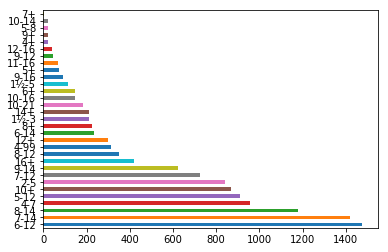

In [18]:
graph1 = df.ages.value_counts()
graph1.plot(kind='barh')

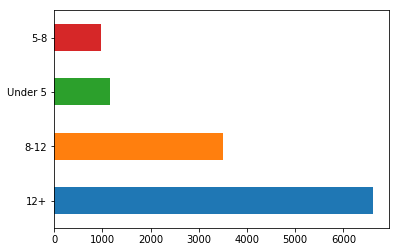

In [19]:
graph2 = df.new_ages.value_counts()
graph2.plot(kind='barh')